# Sentiment analysis
# Group 16
# EG/2020/3905 : Dissanayaka D.M.S.C. 
# EG/2020/3912 : Dissanayake D.M.M.I.T. 

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [81]:
data = pd.read_csv('../dataset/sentiment_analysis.csv')


In [82]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


## Data  Preprocessing

In [83]:
data.shape

(20304, 3)

In [84]:
data.duplicated().sum()   # cheak duplicate values

0

In [85]:
data.isnull().sum()  # cheak is any null data

id       0
label    0
tweet    0
dtype: int64

In [86]:
data["tweet"].tail(5)

20299    ok. for starters, taxi driver is amazing. this...
20300    It's sort of hard for me to say it, because I ...
20301    I still liked it though. Warren Beatty is only...
20302    We could still use Black Adder even today. Ima...
20303    This so-called "documentary" tries to tell tha...
Name: tweet, dtype: object

In [87]:
# Forward fill missing values
data = data.ffill()

# Backward fill missing values
data = data.bfill()

# data = data.dropna()   To delete null vales



In [88]:
data["tweet"].tail(5)

20299    ok. for starters, taxi driver is amazing. this...
20300    It's sort of hard for me to say it, because I ...
20301    I still liked it though. Warren Beatty is only...
20302    We could still use Black Adder even today. Ima...
20303    This so-called "documentary" tries to tell tha...
Name: tweet, dtype: object

In [89]:
data.isnull().sum()  # cheak is any null data

id       0
label    0
tweet    0
dtype: int64

In [90]:
data.duplicated().sum()   # cheak duplicate values

0

## Text PreProcessing

In [91]:
import re 
import string

convrt uppercase to lowercase

In [92]:
data["tweet"].head(5)

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

In [93]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [94]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

remove links

In [95]:
data["tweet"] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [96]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

remove punctuations

In [97]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [98]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)

In [99]:
data["tweet"].tail(10)

20294    this is seriously one of the best low budget b...
20295    i went in expecting the movie to be completely...
20296    superb and charming justin henry is beautiful ...
20297    in short the movie had a little bit of a weak ...
20298    the story goes something like this a smalltown...
20299    ok for starters taxi driver is amazing this th...
20300    its sort of hard for me to say it because i so...
20301    i still liked it though warren beatty is only ...
20302    we could still use black adder even today imag...
20303    this socalled documentary tries to tell that u...
Name: tweet, dtype: object

remove numbers

In [100]:
data["tweet"] = data['tweet'].str.replace('\d+', '', regex=True)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\erang\AppData\Local\Temp\ipykernel_14244\425538495.py:1: SyntaxWarning: invalid escape sequence '\d'
  data["tweet"] = data['tweet'].str.replace('\d+', '', regex=True)


In [101]:
data["tweet"].tail(10)

20294    this is seriously one of the best low budget b...
20295    i went in expecting the movie to be completely...
20296    superb and charming justin henry is beautiful ...
20297    in short the movie had a little bit of a weak ...
20298    the story goes something like this a smalltown...
20299    ok for starters taxi driver is amazing this th...
20300    its sort of hard for me to say it because i so...
20301    i still liked it though warren beatty is only ...
20302    we could still use black adder even today imag...
20303    this socalled documentary tries to tell that u...
Name: tweet, dtype: object

remove stopwords

In [102]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [103]:
import nltk

In [104]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [105]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()
    

In [106]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [107]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [108]:
data["tweet"].head()

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

Stemming

In [109]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [110]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [111]:
data["tweet"].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [112]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
20299,20300,1,ok starter taxi driver amaz taxi driver amaz b...
20300,20301,1,sort hard say greatli enjoy target paper moon ...
20301,20302,0,still like though warren beatti fair comic boo...
20302,20303,0,could still use black adder even today imagin ...


## Building Vacabulary

In [113]:
from collections import Counter
vocab = Counter()

In [114]:
vocab

Counter()

In [115]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [116]:
len(vocab)

80742

In [117]:
data.shape

(20304, 3)

In [118]:
tokens = [key for key in vocab if vocab[key] > 10]

In [119]:
tokens

['fingerprint',
 'pregnanc',
 'test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iphon',
 'final',
 'transpar',
 'silicon',
 'case',
 'thank',
 'uncl',
 'yay',
 'soni',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'connect',
 'im',
 'wire',
 'know',
 'georg',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'question',
 'unless',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'bay',
 'amazon',
 'year',
 'rob',
 'cross',
 'tobi',
 'young',
 'taylor',
 'spectr',
 'start',
 'recip',
 'technolog',
 'bout',
 'shop',
 'listen',
 'music',
 'photo',
 'fun',
 'pool',
 'water',
 'camera',
 'sun',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'thinner',
 'crash',
 'everi',
 'five',
 'ha',
 'heavi',
 'machineri',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'contempl',
 'give',
 'simpli',
 'depress',
 'anoth',
 'crazi',
 '

In [120]:
len(tokens)

12711

In [121]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

## Data Divide

In [122]:
X = data['tweet']
y = data['label']

In [123]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [125]:
X_train.shape

(16243,)

In [126]:
X_test.shape

(4061,)

In [127]:
X_train

1284     dont hate cheap movi dont see wast money movi ...
4022     compar movi anyth almodovar insult almodovar b...
13211    say hasnt said haunt everyth would make great ...
2159     sadli misguid movi stunk start finish hard wat...
3663     grew southern west virginia im age mayb year o...
                               ...                        
3442     first rate movi simpli one best saw sinc born ...
7962     poorli written badli direct short film pure si...
3095     we craven present movi direct joe clayton star...
17358    unthink happen first wit year ago film benchma...
12307    sorri worst film ever seen life cannot believ ...
Name: tweet, Length: 16243, dtype: object

In [128]:
X_test

794      relentless like one loud action movi entir cas...
18844    movi quit bad aggress play well direct well se...
6954     dougla sirk direct overact drama unhappi afflu...
1260     great premis poor execut cast great actor wate...
5282     clichéridden stori impend divorc eye yearold c...
                               ...                        
14864    monstervis show grew late night host penn tell...
16525    japanes anim uniqu freedom anim tend abl come ...
2581     usual like dumbno brain activ movi stupid way ...
1769     prom night br br direct nelson mccormickbr br ...
11608    dictat thin experi life industri cash sofia co...
Name: tweet, Length: 4061, dtype: object

In [129]:
y_train

1284     1
4022     1
13211    0
2159     1
3663     0
        ..
3442     0
7962     1
3095     1
17358    1
12307    1
Name: label, Length: 16243, dtype: int64

## Vectorization

In [130]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new 

In [131]:
vectorized_x_train = vectorizer(X_train, tokens)

In [132]:
vectorized_x_test = vectorizer(X_test, tokens)

In [133]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [134]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [135]:
y_train

1284     1
4022     1
13211    0
2159     1
3663     0
        ..
3442     0
7962     1
3095     1
17358    1
12307    1
Name: label, Length: 16243, dtype: int64

In [136]:
y_test

794      1
18844    1
6954     0
1260     1
5282     1
        ..
14864    0
16525    0
2581     1
1769     1
11608    1
Name: label, Length: 4061, dtype: int64

In [137]:
y_train.value_counts()

label
1    8202
0    8041
Name: count, dtype: int64

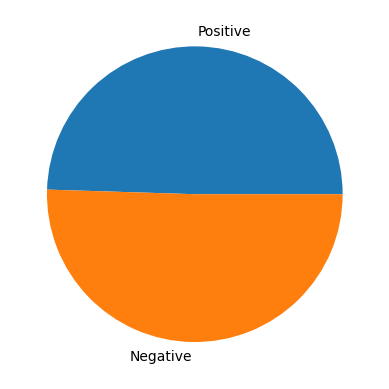

In [138]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

## Handle Imbalanced Data

In [139]:
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [140]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(16404, 12711) (16404,)


In [141]:
y_train_smote.value_counts()

label
1    8202
0    8202
Name: count, dtype: int64

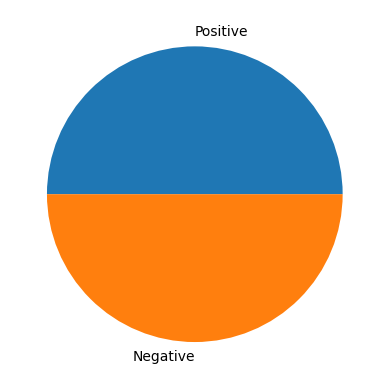

In [142]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [143]:
vectorized_x_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [144]:
y_train_smote

0        1
1        1
2        0
3        1
4        0
        ..
16399    0
16400    0
16401    0
16402    0
16403    0
Name: label, Length: 16404, dtype: int64

In [145]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [146]:
y_test

794      1
18844    1
6954     0
1260     1
5282     1
        ..
14864    0
16525    0
2581     1
1769     1
11608    1
Name: label, Length: 4061, dtype: int64

# Model Training and Evaluation

In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [148]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

###  Logistic Regression

In [149]:
lr = LogisticRegression(C=0.1)

lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)


Training Scores:
	Accuracy = 0.948
	Precision = 0.956
	Recall = 0.939
	F1-Score = 0.947
Testing Scores:
	Accuracy = 0.881
	Precision = 0.882
	Recall = 0.873
	F1-Score = 0.877


Cross-Validation

In [150]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, vectorized_x_train_smote, y_train_smote, cv=5)
print("Cross-validated Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))


Cross-validated Accuracy: 0.869 (+/- 0.012)


In [151]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(vectorized_x_train_smote, y_train_smote)

best_lr = grid_search.best_estimator_
best_lr


c:\Users\erang\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\erang\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

LogisticRegression(C=0.1)

In [152]:
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.948
	Precision = 0.956
	Recall = 0.939
	F1-Score = 0.947
Testing Scores:
	Accuracy = 0.881
	Precision = 0.882
	Recall = 0.873
	F1-Score = 0.877


### Decision Tree

In [153]:
dt = DecisionTreeClassifier(criterion="gini",splitter="best",max_depth=None,min_samples_split=50,min_samples_leaf=10)

dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.818
	Precision = 0.825
	Recall = 0.808
	F1-Score = 0.816
Testing Scores:
	Accuracy = 0.738
	Precision = 0.731
	Recall = 0.732
	F1-Score = 0.731


In [154]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt, vectorized_x_train_smote, y_train_smote, cv=5)
print("Cross-validated Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))


Cross-validated Accuracy: 0.728 (+/- 0.014)


In [155]:
from sklearn.model_selection import GridSearchCV

param_grid = {'min_samples_split': [1,5,10,20,50, 100]}


grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(vectorized_x_train_smote, y_train_smote)


best_dt = grid_search.best_estimator_
best_dt

c:\Users\erang\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\erang\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\erang\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\erang\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py",

DecisionTreeClassifier(min_samples_split=10)

In [156]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)